In [ ]:
## not able to deploy on heroku as it has stopped giving free services

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
X,y = load_boston(return_X_y=True)

In [2]:
df_train = pd.DataFrame(X)

In [3]:
df_train

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
df_test = pd.DataFrame(y)

In [5]:
df_test

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [6]:
## as we see there is no column names so lets try to assign column names

column_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD',
                'TAX','PTRATIO','B','LSTAT']
df_train = pd.DataFrame(X,columns=column_names)
df_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
## lets assign column name to dependent variable
column_name = ['MEDV']
df_test = pd.DataFrame(y,columns=column_name)
df_test.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [8]:
## we assigned column names to the data

df_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [9]:
df_train.shape

(506, 13)

In [10]:
## lets check whether there is any missing values or not 

df_train.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [11]:
## observation - we see there is no null values

In [12]:
## lets check the data types of the columns 

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [13]:
## we see that all the columns are float that is continuous values.

In [14]:
## we see no categorical variable

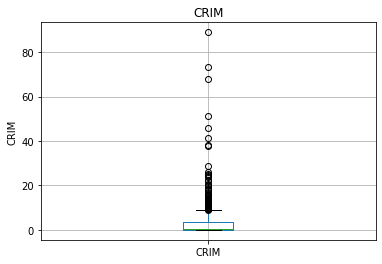

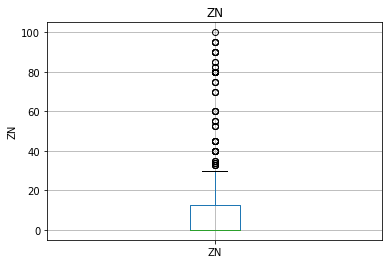

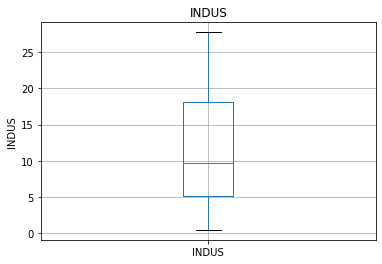

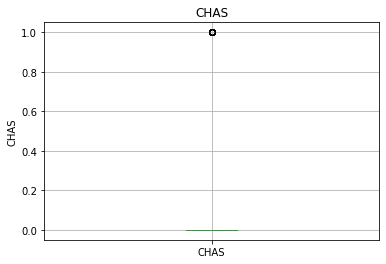

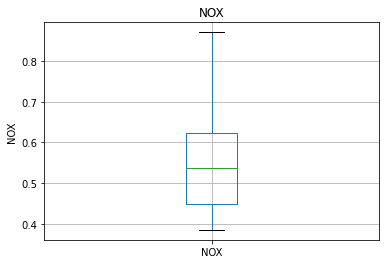

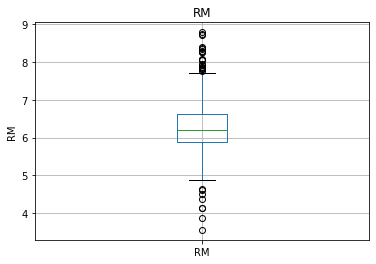

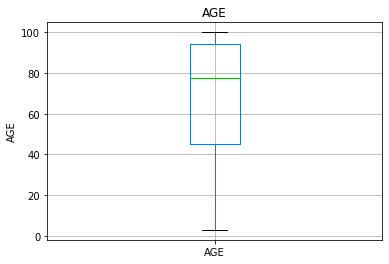

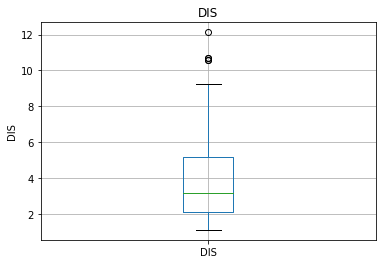

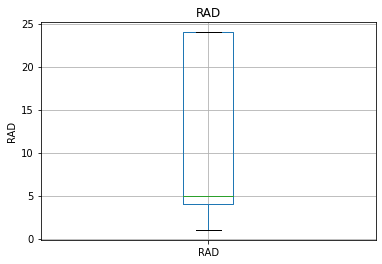

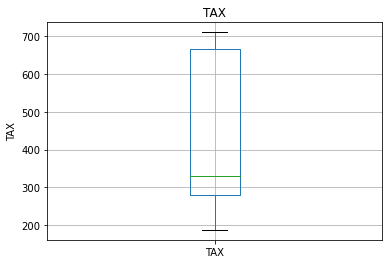

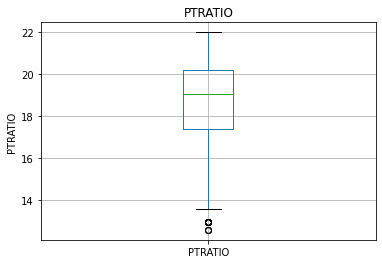

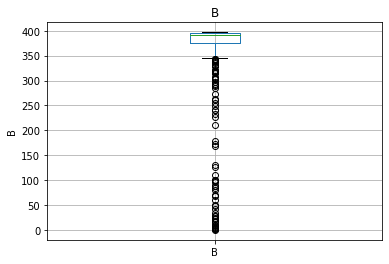

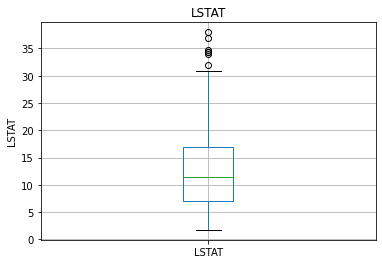

In [15]:
import matplotlib.pyplot as plt
## lets check the outliers 

for feature in df_train.columns:
    df_train.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [16]:
## lets check the percentage of outliers

for i,j in df_train.items():
    q1 = j.quantile(0.25)
    q3 = j.quantile(0.75)
    iqr = q3 - q1
    col = j[(j <= q1 - 1.5 * iqr) | (j >= q3 + 1.5 * iqr)]
    percentage = np.shape(col)[0]*100 / np.shape(df_train)[0]
    print(f"Column {i} have {percentage}% Outliers")

Column CRIM have 13.043478260869565% Outliers
Column ZN have 13.438735177865613% Outliers
Column INDUS have 0.0% Outliers
Column CHAS have 100.0% Outliers
Column NOX have 0.0% Outliers
Column RM have 5.928853754940712% Outliers
Column AGE have 0.0% Outliers
Column DIS have 0.9881422924901185% Outliers
Column RAD have 0.0% Outliers
Column TAX have 0.0% Outliers
Column PTRATIO have 2.964426877470356% Outliers
Column B have 15.217391304347826% Outliers
Column LSTAT have 1.383399209486166% Outliers


In [17]:
## as we see CHAS have 100% outliers so lets try to remove it

df_train.drop(['CHAS'],axis=1,inplace=True)

In [18]:
df_train.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [19]:
df_train.shape  ## we see that the CHAS has been droped

(506, 12)

In [20]:
X = df_train   # Independent features
y = df_test    # Dependent features

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)


In [22]:
X_train

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
13,0.62976,0.0,8.14,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
61,0.17171,25.0,5.13,0.453,5.966,93.4,6.8185,8.0,284.0,19.7,378.08,14.44
377,9.82349,0.0,18.10,0.671,6.794,98.8,1.3580,24.0,666.0,20.2,396.90,21.24
39,0.02763,75.0,2.95,0.428,6.595,21.8,5.4011,3.0,252.0,18.3,395.63,4.32
365,4.55587,0.0,18.10,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.03548,80.0,3.64,0.392,5.876,19.1,9.2203,1.0,315.0,16.4,395.18,9.25
72,0.09164,0.0,10.81,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
396,5.87205,0.0,18.10,0.693,6.405,96.0,1.6768,24.0,666.0,20.2,396.90,19.37
235,0.33045,0.0,6.20,0.507,6.086,61.5,3.6519,8.0,307.0,17.4,376.75,10.88


In [23]:
y_train

,MEDV
13,20.4
61,16.0
377,13.3
39,30.8
365,27.5
...,...
255,20.9
72,22.8
396,12.5
235,24.0


In [24]:
from sklearn import datasets,linear_model,metrics

In [25]:
reg = linear_model.LinearRegression()

In [26]:
reg.fit(X_train,y_train)

LinearRegression()

In [27]:
lin_reg = reg.predict(X_test)

In [28]:
lin_reg

array([[32.90365627],
       [28.08538389],
       [17.98124675],
       [21.55070878],
       [19.29628084],
       [20.24928975],
       [32.95878001],
       [18.01440504],
       [22.70170253],
       [26.97127985],
       [27.50950479],
       [28.73949553],
       [21.20710952],
       [27.18215461],
       [23.6156078 ],
       [21.28199604],
       [17.36718204],
       [38.11464751],
       [30.74623935],
       [ 8.81830859],
       [21.0435573 ],
       [16.69271762],
       [25.36238363],
       [25.00342634],
       [31.77084684],
       [11.02668556],
       [13.6091991 ],
       [16.33830437],
       [36.56287355],
       [14.9320892 ],
       [20.80537021],
       [13.84594413],
       [43.6006575 ],
       [18.13150753],
       [21.4615873 ],
       [20.57183335],
       [17.71024578],
       [27.04403068],
       [10.1052203 ],
       [20.14309076],
       [24.00454069],
       [21.21984686],
       [29.77717405],
       [16.48979844],
       [19.59741452],
       [14

In [29]:
from sklearn.metrics import r2_score


In [30]:
r2_score(y_test,lin_reg)

0.7805148013521934

In [31]:
## we got our r2 score as 0.780415 using linear regression

In [32]:
## Lets Apply Regularization techniques

In [33]:
## Ridge Regression

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [34]:
ridge = Ridge()

In [35]:
parameters = {"alpha":[1e-15,1e-3,1e-2,1,5,10,20,30,40,50]}

In [36]:
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5,verbose=1)
ridge_regressor.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 0.001, 0.01, 1, 5, 10, 20, 30, 40,
                                   50]},
             scoring='neg_mean_squared_error', verbose=1)

In [37]:
prediction_ridge = ridge_regressor.predict(X_test)

In [38]:
r2_score(y_test,prediction_ridge)

0.7806651596815226

In [39]:
## we got 0.7806651596815226 as our r2 score

In [40]:
## lets apply Lasso Regilarization

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [42]:
lasso=Lasso()

In [43]:
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

In [44]:
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3005.603750154183, tolerance: 2.388227526501767
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3306.9156784378292, tolerance: 2.24848496819788
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3213.423460517083, tolerance: 2.3788007420494703
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarni

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [45]:
prediction_lasso = lasso_regressor.predict(X_test)

In [46]:
r2_score(y_test,prediction_lasso)

0.7822780975766559

In [47]:
## we got 0.78227809 as our r2 score

In [48]:
## lets apply elastic net regularization



In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [50]:
elastic = ElasticNet()

In [51]:
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

In [52]:
elasticnet_regressor=GridSearchCV(elastic,parameters,scoring='neg_mean_squared_error',cv=5)
elasticnet_regressor.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2985.450752909318, tolerance: 2.388227526501767
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3436.3337573892827, tolerance: 2.24848496819788
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3256.0656488217855, tolerance: 2.3788007420494703
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarn

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [53]:
prediction_elastic = elasticnet_regressor.predict(X_test)

In [54]:
r2_score(y_test,prediction_elastic)

0.7826374489644872

In [70]:
## we got 0.7826374489644872 as our r2 score